<a href="https://www.kaggle.com/code/entropapi/entro-titanic?scriptVersionId=154509570" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

test = pd.read_csv("/kaggle/input/titanic/test.csv")
train = pd.read_csv("/kaggle/input/titanic/train.csv")

train.drop('PassengerId', axis=1, inplace=True)

test.drop('Name', axis=1, inplace=True)
train.drop('Name', axis=1, inplace=True)

test.drop('Embarked', axis=1, inplace=True)
train.drop('Embarked', axis=1, inplace=True)

In [2]:
train.head()
train.tail()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin
886,0,2,male,27.0,0,0,211536,13.00,NaN
887,1,1,female,19.0,0,0,112053,30.00,B42
888,0,3,female,NaN,1,2,W./C. 6607,23.45,NaN
889,1,1,male,26.0,0,0,111369,30.00,C148
890,0,3,male,32.0,0,0,370376,7.75,NaN


In [3]:
train.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
dtype: object

In [4]:
print(train.shape)
print(train.isnull().sum())

(891, 9)
Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
dtype: int64


In [5]:
#making a new df to study the correlation matrix of rows with non-missing values in order to fill the missing data

train_no_missing = train.dropna()

In [6]:
train_no_missing['Sex'].value_counts()

Sex
male      95
female    90
Name: count, dtype: int64

In [7]:
le = LabelEncoder()
train_no_missing.loc[:,'Sex'] = le.fit_transform(train_no_missing['Sex'])

In [8]:
train_no_missing['Ticket'].value_counts()

Ticket
113760      4
19950       4
110413      3
PC 17572    3
110152      3
           ..
113784      1
113043      1
28551       1
36928       1
111369      1
Name: count, Length: 128, dtype: int64

In [9]:
le = LabelEncoder()
train_no_missing.loc[:,'Ticket'] = le.fit_transform(train_no_missing['Ticket'])

In [10]:
train_no_missing['Cabin'].value_counts()

Cabin
G6             4
C23 C25 C27    4
B96 B98        4
F2             3
C22 C26        3
              ..
C91            1
C124           1
C32            1
E34            1
C148           1
Name: count, Length: 134, dtype: int64

In [11]:
le = LabelEncoder()
train_no_missing.loc[:,'Cabin'] = le.fit_transform(train_no_missing['Cabin'])

In [12]:
train_no_missing.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
dtype: object

In [13]:
train_no_missing.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin
Survived,1.000000,-0.037227,-0.535727,-0.244604,0.100339,0.018723,0.015068,0.134019,-0.020474
Pclass,-0.037227,1.000000,-0.041725,-0.307590,-0.100324,0.049894,0.258920,-0.315069,0.479082
Sex,-0.535727,-0.041725,1.000000,0.172307,-0.095344,-0.081832,-0.054781,-0.129871,-0.030154
Age,-0.244604,-0.307590,0.172307,1.000000,-0.161625,-0.274813,-0.030471,-0.091542,-0.149986
SibSp,0.100339,-0.100324,-0.095344,-0.161625,1.000000,0.258993,-0.019684,0.285492,0.053205
Parch,0.018723,0.049894,-0.081832,-0.274813,0.258993,1.000000,-0.028936,0.388783,-0.019053
Ticket,0.015068,0.258920,-0.054781,-0.030471,-0.019684,-0.028936,1.000000,0.179107,0.129870
Fare,0.134019,-0.315069,-0.129871,-0.091542,0.285492,0.388783,0.179107,1.000000,-0.284495
Cabin,-0.020474,0.479082,-0.030154,-0.149986,0.053205,-0.019053,0.129870,-0.284495,1.000000


<Axes: >

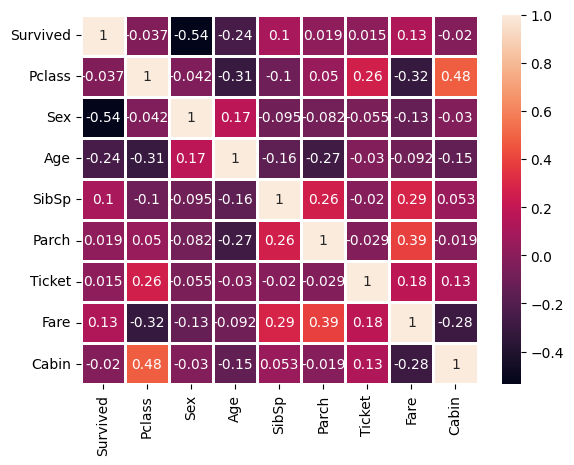

In [14]:
sns.heatmap(train_no_missing.corr(), linewidth=1, annot=True)

In [15]:
# Age is higly correlated with Parch and Pclass

In [16]:
# using Parch and Pclass to populate the missing values in the age column
train['Age'] = train.groupby(['Pclass', 'Parch'])['Age'].transform(lambda x: x.fillna(x.mean()))

In [17]:
train['Cabin'] = train['Cabin'].fillna('X')
#All passengers who did not have a personal cabin have a missing Cabin value.The missing data in this column is treated as a different class.

In [18]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin
0,0,3,male,22.0,1,0,A/5 21171,7.2500,X
1,1,1,female,38.0,1,0,PC 17599,71.2833,C85
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,X
3,1,1,female,35.0,1,0,113803,53.1000,C123
4,0,3,male,35.0,0,0,373450,8.0500,X


In [19]:
#encoding categorical values

le = LabelEncoder()
train['Sex'] = le.fit_transform(train['Sex'])

train['Cabin'] = le.fit_transform(train['Cabin'])

train['Ticket'] = le.fit_transform(train['Ticket'])

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict, RepeatedStratifiedKFold
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

Xtrain = train.drop(columns = ['Survived'])
Ytrain = train['Survived']

In [21]:
models = {
  'Logistic Regression': LogisticRegression(max_iter = 1000),
  'SVM': SVC(),
  'Naive Bayes': GaussianNB(),
  'Decision Tree': DecisionTreeClassifier(),
  'Random Forest': RandomForestClassifier()
}

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

for name, model in models.items():
 scores = cross_val_score(model, Xtrain, Ytrain, cv=cv, scoring='accuracy')
 print(f'{name} Cross-Validation Score: {scores.mean() * 100} (+/- {scores.std() * 2})')

Logistic Regression Cross-Validation Score: 79.64835622138993 (+/- 0.07948404154490238)
SVM Cross-Validation Score: 67.4153141905951 (+/- 0.08200064781371069)
Naive Bayes Cross-Validation Score: 76.39159384103205 (+/- 0.07507913169602816)
Decision Tree Cross-Validation Score: 78.00208073241781 (+/- 0.10044840653709448)
Random Forest Cross-Validation Score: 84.24927174365374 (+/- 0.059545771412990486)


In [22]:
# using xg boost to boost the accuracy of random forrest and get results
import xgboost
print(xgboost.__version__)

from xgboost import XGBRFClassifier

2.0.2


In [23]:
#searching for the best parameters
from sklearn.model_selection import GridSearchCV

param_grid = {
   'n_estimators': [100, 200, 300, 400, 500],
   'max_depth': [2, 3, 5, 10, 15],
   'learning_rate': [0.05, 0.1, 0.15, 0.20],
   'min_child_weight': [1, 2, 3, 4]
}

model = XGBRFClassifier()

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', verbose=2, n_jobs=-1)

grid_search.fit(Xtrain, Ytrain)

best_params = grid_search.best_params_

Fitting 5 folds for each of 400 candidates, totalling 2000 fits
[CV] END learning_rate=0.05, max_depth=2, min_child_weight=1, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=2, min_child_weight=1, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=2, min_child_weight=1, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=2, min_child_weight=1, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=2, min_child_weight=1, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=2, min_child_weight=1, n_estimators=500; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=2, min_child_weight=2, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=2, min_child_weight=2, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=2, min_child_weight=2, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=2, min

In [24]:
#tuning the hyperparameters of xgbrfclassifier to best_params
#model = XGBRFClassifier(**best_params)

#cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

#scores = cross_val_score(model, Xtrain, Ytrain, cv=cv, scoring='accuracy')
#print(f'{model} Cross-Validation Score: {scores.mean() * 100} (+/- {scores.std() * 2})')

In [25]:
#the xgboost score is lower than the base rfclassifier score so some method to improve the score must be applied
#using adaboostclassifier to improve the score

from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier(random_state=0)

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

scores = cross_val_score(model, Xtrain, Ytrain, cv=cv, scoring='accuracy')
print(f'{model} Cross-Validation Score: {scores.mean() * 100} (+/- {scores.std() * 2})')

AdaBoostClassifier(random_state=0) Cross-Validation Score: 81.59217644610902 (+/- 0.06694789144285351)


In [26]:
#adaboost score is also lower than the rf score
#calculating the score after dropping the Cabin column
Xtrain = train.drop(columns = ['Survived', 'Cabin'])

model = RandomForestClassifier()

n_scores = cross_val_score(model, Xtrain, Ytrain, scoring='accuracy', cv=cv, n_jobs=-1)
print(f'{model} Cross-Validation Score: {scores.mean() * 100} (+/- {scores.std() * 2})')

RandomForestClassifier() Cross-Validation Score: 81.59217644610902 (+/- 0.06694789144285351)


In [27]:
#Proceeding with Random Forrest with the Cabin column
test.isnull().sum()

PassengerId      0
Pclass           0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
dtype: int64

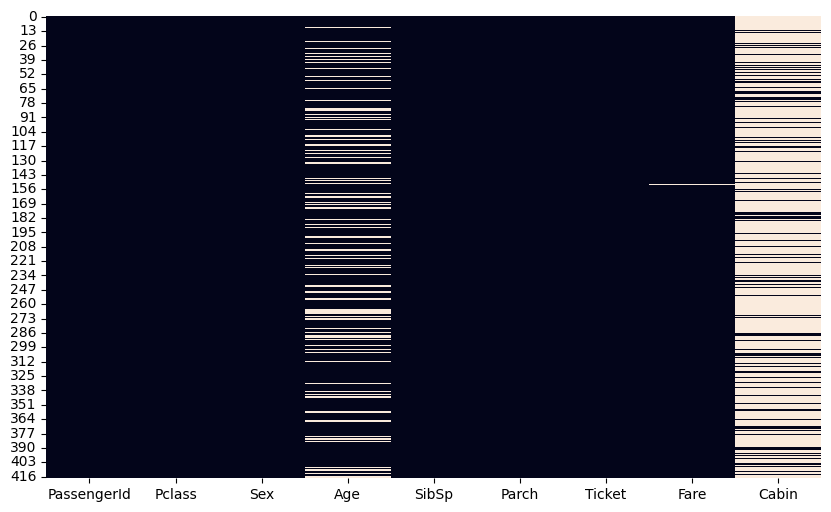

In [28]:
plt.figure(figsize=(10,6))
sns.heatmap(test.isnull(), cbar=False)
plt.show()

In [29]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin
0,892,3,male,34.5,0,0,330911,7.8292,NaN
1,893,3,female,47.0,1,0,363272,7.0000,NaN
2,894,2,male,62.0,0,0,240276,9.6875,NaN
3,895,3,male,27.0,0,0,315154,8.6625,NaN
4,896,3,female,22.0,1,1,3101298,12.2875,NaN


In [30]:
test['Cabin'] = test['Cabin'].fillna('X')
test['Age'] = test.groupby(['Pclass', 'Parch'])['Age'].transform(lambda x: x.fillna(x.mean()))
test['Fare'].fillna(test['Fare'].median(), inplace=True)

In [31]:
#encoding categorical values

test['Sex'] = le.fit_transform(test['Sex'])
test['Cabin'] = le.fit_transform(test['Cabin'])
test['Ticket'] = le.fit_transform(test['Ticket'])

In [32]:
null_values = test['Age'].isnull()
print(test[null_values])

     PassengerId  Pclass  Sex  Age  SibSp  Parch  Ticket     Fare  Cabin
132         1024       3    0  NaN      0      4     256  25.4667     76
342         1234       3    1  NaN      1      9     296  69.5500     76
365         1257       3    0  NaN      1      9     296  69.5500     76


In [33]:
test['Age'] = test['Age'].fillna(test['Age'].mean())

In [34]:
Xtrain = train.drop(columns = ['Survived'])
Ytrain = train['Survived']
Xtest = test.drop(columns = ['PassengerId'])

model = RandomForestClassifier()

model.fit(Xtrain, Ytrain)

predictions = model.predict(Xtest)

#outputing the results

output = pd.DataFrame({'PassengerId': test.PassengerId, 'Survived': predictions})
output.to_csv('/kaggle/working/submission.csv', index = False)